# T3
Primero, cargamos las librerías necesarias:

In [865]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os # para guardar ficheros y crear directorios

## 2.1 (a)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

Al desempaquetas el .wav, obtenemos dos variables, una con sample rate, y otra con la data, donde la primera compoente de data.shape contiene la cantidad total de samples (muestras). Luego, para obtener la duración, debemos dividir el total de muestras por el sample_rate.

In [866]:
sample_rate, data = wavfile.read('piano-sample.wav') # Cargamos el .wav

# Definimos los parámetros del audio con las variables que cargamos
total_samples = data.shape[0]
duration = total_samples / sample_rate


print(f"El array de datos tiene la forma {data.shape}\n")

print(f"Sample rate: {sample_rate}Hz")
print(f"Total samples: {total_samples}")
print(f"Duración del audio en segundos: {duration}s")

El array de datos tiene la forma (960000, 2)

Sample rate: 48000Hz
Total samples: 960000
Duración del audio en segundos: 20.0s


## 2.1 (b)
De la variable data, que contiene el audio de la pista de piano, debemos seleccionar todos los valores, pero ponemos [:,0] para seleccionar sólo el primer canal, que corresponde al izquierdo, (el derecho sería 1).

Luego, para normalizar los datos de la variable ``data_izq_mono`` obtenida, lo que debemos hacer es dividir esa variable de datos del piano por el máximo valor absoluto contenido en ese audio, para así poder realizar el escalamiento.

In [867]:
data_izq_mono = data[:, 0] # Extramos el canal izquierdo, que es la primera componente, 0

max_val = np.max(np.abs(data_izq_mono))
data_normalized = data_izq_mono / max_val

min_data_value = np.min(data_normalized)
max_data_value = np.max(data_normalized)

print(f"Normalización de datos en el rango :\n[{min_data_value}, {max_data_value:.2f}]")

Normalización de datos en el rango :
[-1.0, 0.99]


## 2.1 (c)
Primero, con linespace de numpy, creamos el eje x en función del tiempo, cuya duración será igual a la variable ``duration`` calculada previamente. Al hacer el plot, necesitamos poner en el **eje x** la duración temporal, mientras que en el **eje y** ponemos la amplitud normalizada en la variable ``data_normalized``, que en este caso va de 0 a 1, aproximadamente.

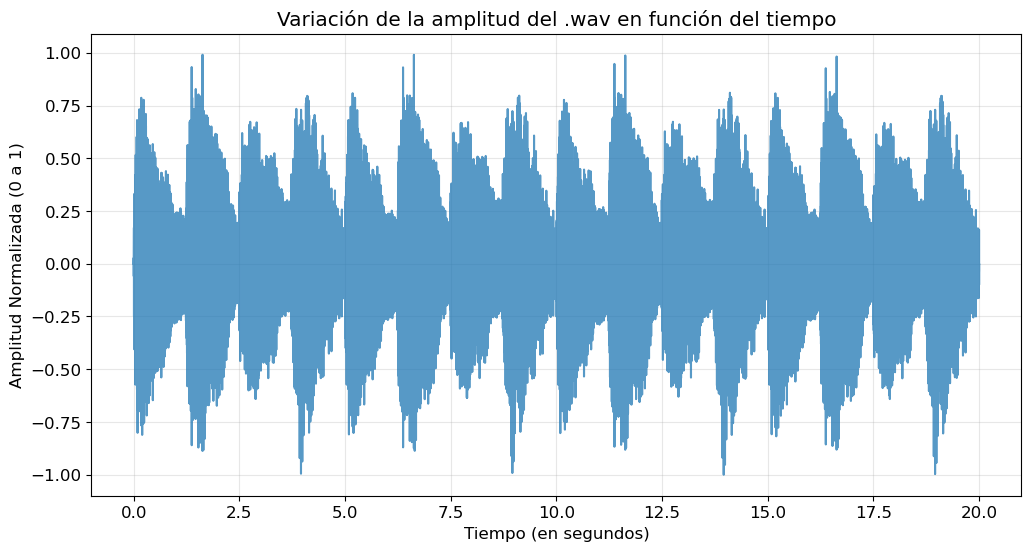

In [868]:
time_duration_axis = np.linspace(0, duration, total_samples) # Generamos el intervalo de teimpo para el eje x

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_duration_axis, data_normalized, alpha=0.75)
plt.title("Variación de la amplitud del .wav en función del tiempo")
plt.xlabel("Tiempo (en segundos)")
plt.ylabel("Amplitud Normalizada (0 a 1)")
plt.grid(True, alpha=0.3)
plt.show()

En el audio se escucha un sonido muy relajante de piano, con unas notas bastante agudas que se repiten en diferente amplitud y frecuencia, casi formando un ciclo ordenado, podemos apreciar en el gráfico anterior, mediante la amplitud normalizada, esa repetición de la amplitud en función del tiempo, se ve que la amplitud tiene picos superior repetidos al menos 4 veces, y eso coincide con lo escuchado en el audio.

## 2.1 (d)

https://numpy.org/devdocs/reference/generated/numpy.fft.rfft.html

https://numpy.org/devdocs/reference/generated/numpy.fft.rfftfreq.html

In [869]:
# calculamos la transformada de fourier con valores reales
fft_spectrum = np.fft.rfft(data_normalized)

# Obtenemos las frecuencias con el total de samples y su sample_rate
fft_frequencies = np.fft.rfftfreq(total_samples, 1/sample_rate)

Para obtener el valor absoluto de cada frecuencia en un arreglo, usamos la librería numpy con el método abs, como antes:

In [870]:
ftt_abs_freq = np.abs(fft_spectrum) # Magnitud de la FFT

print(f"Componentes de frecuencia calculadas: {len(fft_frequencies)}")

Componentes de frecuencia calculadas: 480001


## 2.1 (e)
En el gráfico, tuve que limitar el límite en el eje x, o de frecuencias, porque hay magnitudes muy pequeñas a la derecha del eje x que no nos interesan, y como el enunciado sólo pide **identificar las 10 frecuencias con mayor magnitud**, limitamos el eje x.

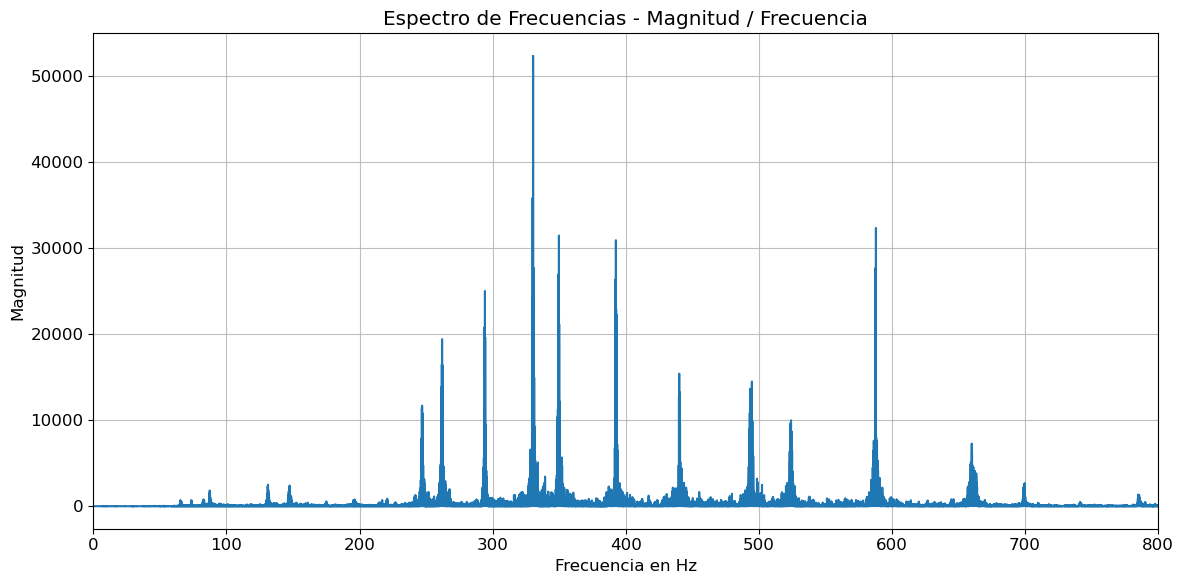

In [871]:
plt.figure(figsize=(12, 6))
plt.plot(fft_frequencies, ftt_abs_freq)
plt.title("Espectro de Frecuencias - Magnitud / Frecuencia")
plt.xlabel("Frecuencia en Hz")
plt.ylabel("Magnitud")
plt.xlim(0, 800) # El límite de frecuencia lo ponemos en 800 para ver los 10 picos principales
plt.grid(True, alpha=0.8)
plt.tight_layout()
plt.show()

En el gráfico anterior se pueden obervar las magnitudes para las frecuencias en Hz, pero las 10 principales están al inicio, por debajo de los 1000Hz. 

Para poder identificarlas con precisión, y no sólo visualmente, podemos usar numpy:

In [872]:
index_of_ordered_array = np.argsort(ftt_abs_freq) #esto nos da los índices ordenados de menor a mayor
index_of_ordered_array = index_of_ordered_array[-10:] # Tomamos los 10 últimos
top_10_freq_index = index_of_ordered_array[::-1] # Invertimos el orden de mayor a menor

print("10 frecuencias con mayor magnitud:\n")
for i, idx in enumerate(top_10_freq_index):
    actual_freq = fft_frequencies[idx]
    actual_magnitude = ftt_abs_freq[idx]
    print(f"{i+1}-  {actual_freq}Hz   (con una magnitud de: {actual_magnitude} unidades)")

10 frecuencias con mayor magnitud:

1-  330.40000000000003Hz   (con una magnitud de: 52397.42330662192 unidades)
2-  330.0Hz   (con una magnitud de: 35876.2864794336 unidades)
3-  588.0Hz   (con una magnitud de: 32372.23173734154 unidades)
4-  349.8Hz   (con una magnitud de: 31486.898234089058 unidades)
5-  392.6Hz   (con una magnitud de: 30946.03499460999 unidades)
6-  330.8Hz   (con una magnitud de: 27727.32023108783 unidades)
7-  587.6Hz   (con una magnitud de: 27685.874720468684 unidades)
8-  349.6Hz   (con una magnitud de: 27025.69539098785 unidades)
9-  392.20000000000005Hz   (con una magnitud de: 26351.82476658889 unidades)
10-  294.2Hz   (con una magnitud de: 25037.97172850703 unidades)


## 2.1 (f)

En esta página https://es.wikipedia.org/wiki/Frecuencias_de_afinaci%C3%B3n_del_piano y otras en internet, se pueden encontrar tablas que indican la frecuencia de cada nota musical en el contexto de un piano. Se indica que la distribución de frecuencia de **"temperamento igual"** es donde "la octava está dividida en 12 semitonos perfectamente iguales" desde el punto de vista logarítmico, y se indica que para calcular cada tono, hay que multiplicar el tono anterior por la **raíz duodécima de dos**, esto es, por **2^(1/12)**.

Por lo tanto, para obtener una nota, debemos usar la fórmula
$$f = 440 \times 2^{(n/12)}$$
donde $n$ es el número de semitonos de distancia desde la nota A4

Dado que el enunciado de esta pregunta dice que se investiguen a qué notas musicales corresponden estas frecuencias, asumiré que se refiere a las 10 frecuencias con mayor magnitud anteriormente calculadas, de las cuales podemos ver que las frecuencias tienen su correspondencia en notas musicales, para la notación anglosajona:

- 330Hz: E4
- 588Hz: D5
- 349Hz: F4
- 392Hz: G4
- 587Hz: D5
- 392Hz: G4
- 294Hz: D4

Estos valores de frecuencia en Hz son valores aproximados, y también hay valores con pequeñas variaciones en la frecuencia, pero que corresponden a la misma nota en la práctica.

## 2.1 (g)
Como dice el enunciado, hacemos una copia por valor (deep copy), y no por referencia, de las variables que contienen el espectro de los sonidos del piano, para generar los arrays:

In [873]:
fft_spectrum_filter_1 = fft_spectrum.copy()
fft_spectrum_filter_2 = fft_spectrum.copy()

Creamos los filtros y los aplicamos. Si entendí bien, hay que aplicar el primer filtro a la primera copia, y el segundo a la segunda copia:

In [874]:
# Filtro booleano para valores mayores a 400 Hz:
filter_freq_above_400 = fft_frequencies > 400
fft_spectrum_filter_1[filter_freq_above_400] = 0

# --- Filtro 2: Remover 3 frecuencias más altas (+- 10 Hz) ---
# Ya tenemos los índices de las mayores magnitudes en top_10_indices
'''Para este filtro, como ya tenemos los índices de las 10 mayores magnitudes,
sólo debemos tomar los 3 primeros, y con estos índices de frecuencias con mayor magnitud, 
eliminamos un rango de 10Hz por arriba y por abajo (+-10 Hz) alrededor de cada una de estas frecuencias.'''
top_3_freq_index = top_10_freq_index[:3]

for index in top_3_freq_index:
    freq_centered = fft_frequencies[index]
    
    # Rango superior e inferior para filtrar
    lower_freq_range = freq_centered - 10
    upper_freq_range = freq_centered + 10
    
    # Buscamos los índices dentro del rango que definimos
    filter_peaks_freq = (fft_frequencies >= lower_freq_range) & (fft_frequencies <= upper_freq_range)
    fft_spectrum_filter_2[filter_peaks_freq] = 0

Finalmente, tomamos la transformada inversa con el método de numpy del enunciado, de cada uno de los arreglos filtrados, donde se pide que la longitud del parámetro $n$ sea igual a la longitud original del audio:

In [875]:
filtered_audio1 = np.fft.irfft(fft_spectrum_filter_1, n=total_samples)
filtered_audio2 = np.fft.irfft(fft_spectrum_filter_2, n=total_samples)

## 2.1 (h)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html


Al hacer un reescalado de la data, dado que el número entregado es el límite para un archivo de 16 bits, debemos convertir la data en float a enteros de 16 bits, con ``np.int16 de numpy``, ya que antes habíamos normalizado la amplitud a valores entre -1 y 1, por lo que debemos volver a escalar a enteros de 16 bits en el rango indicado.

In [876]:
number_to_scale = 32767

output_dir = 'results'
os.makedirs(output_dir, exist_ok=True) # lo creamos si no existe

def save_wav_file(filename, rate, data):
    
    path_to_save_audio = os.path.join(output_dir, filename)
    
    # Hacemos un reescalado de la data por 32767
    scaled_data = np.int16(data * number_to_scale)
    wavfile.write(path_to_save_audio, rate, scaled_data)
    print(f"Archivo guardado en la ruta: {path_to_save_audio}")

save_wav_file('piano_filtered_400hz.wav', sample_rate, filtered_audio1)
save_wav_file('piano_filtered_peaks.wav', sample_rate, filtered_audio2)

Archivo guardado en la ruta: results\piano_filtered_400hz.wav
Archivo guardado en la ruta: results\piano_filtered_peaks.wav


Escuchando los audios, podemos notar comparaciones entre las pistas filtradas con respecto a la original. 

Primero, el audio con el audio acotado a frecuencias de hasta 400 Hertz suena muy "apagado", porque suena muy grave, con menos riqueza de sonidos, evidentemente de recortó y las frecuencias más altas no se escuchan, por lo que suenan las frecuencias de "menor vibración", lo que produce un sonido mucho más tranquilo y lento.

Con respecto al segundo filtro, el que remueve las 3 frecuencias con valores más altos (+- 10 Hertz) suena también con falta de contenido, como si pasáramos de un audio en calidad estéreo a mono, suena como si le faltara algo, se aprecia una falta de definición, esto ocurre porque hemos recortado las frecuencias a valores menores, hemos recortado o sumado 10 Hertz, lo que produce una distorsión del sonido original.

## 2.2 (a)

In [877]:
sample_rate_arnold, data_arnold = wavfile.read('arnold-sample.wav') # Cargamos el .wav

total_samples_arnold = data_arnold.shape[0]
duration_arnold_wav = total_samples_arnold / sample_rate_arnold


print(f"El array de datos tiene la forma {data_arnold.shape}\n")

print(f"Sample rate: {sample_rate_arnold}Hz")
print(f"Total samples: {total_samples_arnold}")
print(f"Duración del audio en segundos: {duration_arnold_wav}s")

El array de datos tiene la forma (2823168, 2)

Sample rate: 44100Hz
Total samples: 2823168
Duración del audio en segundos: 64.01741496598639s


## 2.2 (b)

De la variable data_arnold, que contiene el audio de la pista de piano, debemos seleccionar todos los valores, pero ponemos [:,0] para seleccionar sólo el primer canal, que corresponde al izquierdo, (el derecho sería 1).

Luego, para normalizar los datos de la variable ``data_izq_mono_arnold`` obtenida, lo que debemos hacer es dividir esa variable de datos del audio por el máximo valor absoluto contenido en ese audio, para así poder realizar el escalamiento.

In [878]:
data_izq_mono_arnold = data_arnold[:, 0] # Extramos el canal izquierdo, que es la primera componente, 0

max_val_arnold = np.max(np.abs(data_izq_mono_arnold))
data_arnold_normalized = data_izq_mono_arnold / max_val_arnold

min_data_value_arnold = np.min(data_arnold_normalized)
max_data_value_arnold = np.max(data_arnold_normalized)

print(f"Normalización de datos en el rango :\n[{min_data_value_arnold}, {max_data_value_arnold:.2f}]")

Normalización de datos en el rango :
[-1.0, 0.93]


## 2.2 (c)
Primero, con linespace de numpy, creamos el eje x en función del tiempo, cuya duración será igual a la variable ``duration_arnold_wav`` calculada previamente. Al hacer el plot, necesitamos poner en el **eje x** la duración temporal, mientras que en el **eje y** ponemos la amplitud normalizada en la variable ``data_arnold_normalized``, que en este caso va de 0 a 1, aproximadamente.

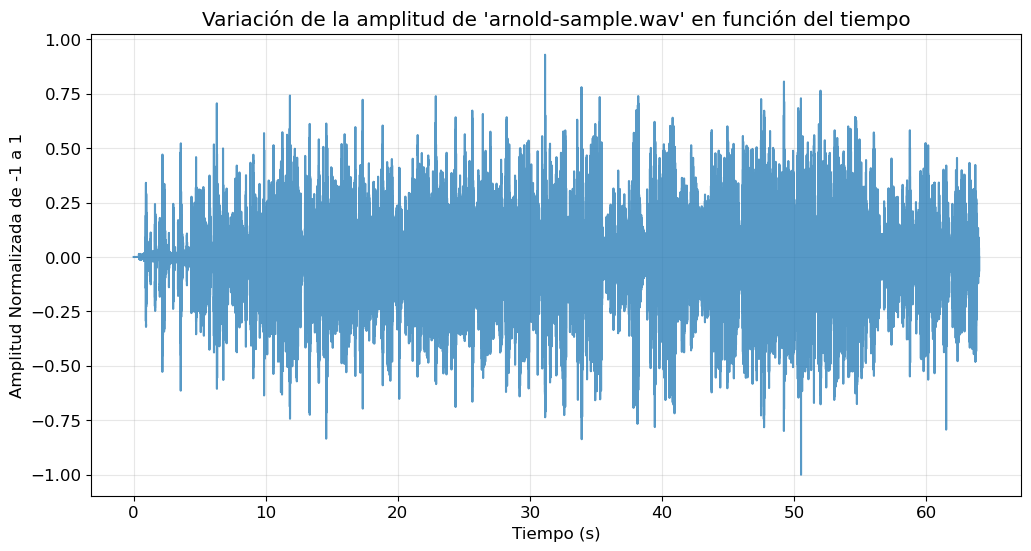

In [879]:
# Generamos el intervalo de teimpo para el eje x
time_duration_arnold = np.linspace(0, duration_arnold_wav, total_samples_arnold)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_duration_arnold, data_arnold_normalized, alpha=0.75)
plt.title("Variación de la amplitud de 'arnold-sample.wav' en función del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud Normalizada de -1 a 1")
plt.grid(True, alpha=0.3)
plt.show()

En el audio ``arnold-sample.wav``, a diferencia del primer audio, se puede escuchar una mayor variedad de sonidos, algunos de frecuencia muy aguda y otros más graves, se aprecian sonidos de instrumentos parecidos a trompetas, otras de campanas muy agudas, otras de notas de piano musical como piano, entre otros más, y justamente el gráfico deja apreciar esto en su amplitud, donde vemos que hay muchísimas variaciones de ésto en función del tiempo, y que también ocurren en un corto muy periodo de tiempo, los sonidos se mezclan en el tiempo, y cambian de uno a otro diferente muy rápido.

## 2.2 (d)

https://numpy.org/devdocs/reference/generated/numpy.fft.rfft.html

https://numpy.org/devdocs/reference/generated/numpy.fft.rfftfreq.html

In [880]:
# calculamos la transformada de fourier con valores reales
fft_spectrum_arnold = np.fft.rfft(data_arnold_normalized)

# Obtenemos las frecuencias con el total de samples y su sample_rate
fft_frequencies_arnold = np.fft.rfftfreq(total_samples_arnold, 1/sample_rate_arnold)

Para obtener el valor absoluto de cada frecuencia en un arreglo, usamos la librería numpy con el método abs, como antes:

In [881]:
ftt_abs_freq_arnold = np.abs(fft_spectrum_arnold) # Magnitud de la FFT

print(f"cantidad de componentes de frecuencia calculadas: {len(fft_frequencies_arnold)}")

cantidad de componentes de frecuencia calculadas: 1411585


## 2.2 (e)
En el gráfico, tuve que limitar el límite en el eje x, o de frecuencias, porque hay magnitudes muy pequeñas a la derecha del eje x que no nos interesan, y como el enunciado sólo pide **identificar las 10 frecuencias con mayor magnitud**, limitamos el eje x.

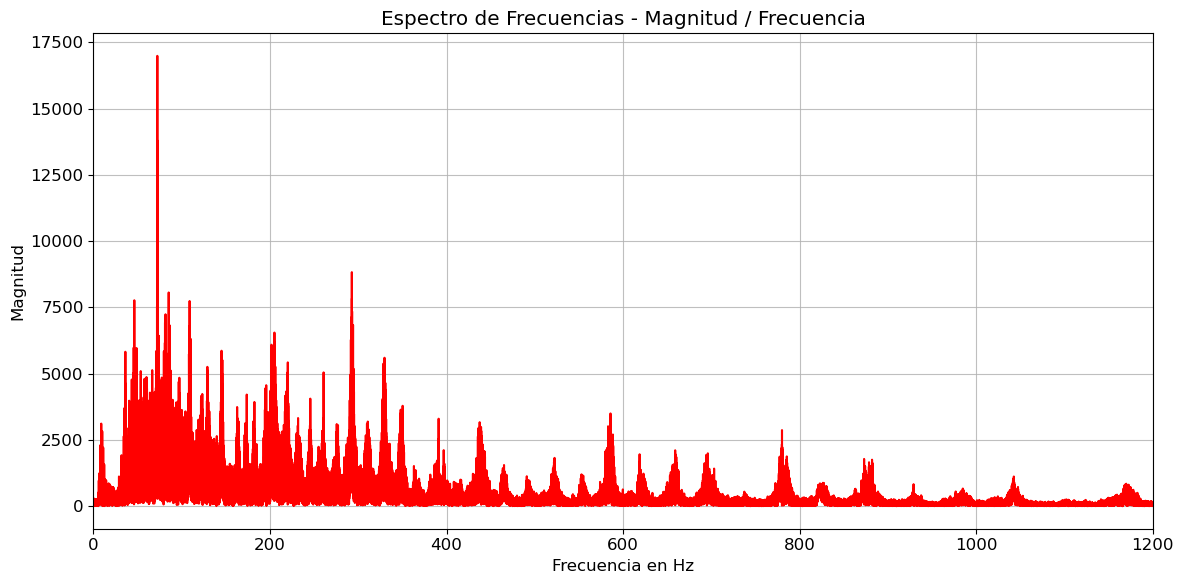

In [882]:
plt.figure(figsize=(12, 6))
plt.plot(fft_frequencies_arnold, ftt_abs_freq_arnold, color='red')
plt.title("Espectro de Frecuencias - Magnitud / Frecuencia")
plt.xlabel("Frecuencia en Hz")
plt.ylabel("Magnitud")
plt.xlim(0, 1200) # El límite de frecuencia lo ponemos en 800 para ver los 10 picos principales
plt.grid(True, alpha=0.8)
plt.tight_layout()
plt.show()

En el gráfico anterior se pueden obervar las magnitudes para las frecuencias en Hz, pero las 10 principales están al inicio, por debajo de los 1000Hz.

Para poder identificarlas con precisión, y no sólo visualmente, podemos usar numpy. En este caso es necesario, puesto que no es tan fácil identificarlas, ya que no están tan fácilmente "marcadas" como en el caso del .wav anterior.

In [883]:
index_of_ordered_array = np.argsort(ftt_abs_freq_arnold) #esto nos da los índices ordenados de menor a mayor
index_of_ordered_array = index_of_ordered_array[-10:] # Tomamos los 10 últimos
top_10_freq_index = index_of_ordered_array[::-1] # Invertimos el orden de mayor a menor

print("10 frecuencias con mayor magnitud:\n")
for i, idx in enumerate(top_10_freq_index):
    actual_freq = fft_frequencies_arnold[idx]
    actual_magnitude = ftt_abs_freq_arnold[idx]
    print(f"{i+1} -  {actual_freq} Hz   (con una magnitud de {actual_magnitude} unidades)")

10 frecuencias con mayor magnitud:

1 -  72.41779447769315 Hz   (con una magnitud de 16993.57400864011 unidades)
2 -  72.77707171517955 Hz   (con una magnitud de 13790.29069196642 unidades)
3 -  72.44903597660502 Hz   (con una magnitud de 9883.303489583506 unidades)
4 -  292.73284480413497 Hz   (con una magnitud de 8831.592705311947 unidades)
5 -  85.28929202937977 Hz   (con una magnitud de 8064.790786388723 unidades)
6 -  72.62086422062025 Hz   (con una magnitud de 7909.446369066923 unidades)
7 -  292.8578107997824 Hz   (con una magnitud de 7840.071872927318 unidades)
8 -  46.34676363574538 Hz   (con una magnitud de 7770.570463891853 unidades)
9 -  292.8265693008706 Hz   (con una magnitud de 7766.226847117953 unidades)
10 -  108.98596895402613 Hz   (con una magnitud de 7742.621375574498 unidades)


A diferencia del primer audio, este muestra en su gráfica muchos más peaks de magnitud, y también mucha más riqueza en su primer gráfico de frecuencia, esto indica que el .wav tiene mucha más riqueza de sonidos, más varianza, es armónicamente más rico.

Ahora, investigando sobre los armónicos y la frecuencia fundamental:

https://youtu.be/TadFVqpgkvQ

https://youtu.be/UdOLdqFvZw4

https://www-physicsclassroom-com.translate.goog/class/sound/lesson-4/fundamental-frequency-and-harmonics?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc

https://en-wikipedia-org.translate.goog/wiki/Fundamental_frequency?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc

Podemos determinar que, mirando el gráfico y las 10 frecuencias con mayor magnitud, **NO se trata de una serie armónica o de una frecuencia fundamental repetida**, porque si miramos los valores de Hz en las frecuencias, vemos que los peaks no siguen el patrón que sigue la frecuencia fundamental, donde hay una frecuencia base, y después hay múltiplos de esa frecuencia en el gráfico. Tampoco, si revisamos analíticamente los resultados exactos, parece existir un patrón de este tipo, además si escuchamos el audio, podemos oír que hay diferentes sonidos de diferencias frecuencias sonando a la vez, pareciera una canción de tipo Jazz por el ritmo.

## 2.2 (f)
Al igual que antes, usamos la técnica de filtrado que pone a 0 las frecuencias que no queremos capturar:

In [884]:
# generamos las copias de los arrays para los filtros
spec_f1 = fft_spectrum_arnold.copy() # > 1000 Hz
spec_f2 = fft_spectrum_arnold.copy() # < 1000 Hz
spec_f3 = fft_spectrum_arnold.copy() # magnitud > 1000
spec_f4 = fft_spectrum_arnold.copy() # magnitud < 1000

spec_f1[fft_frequencies_arnold <= 1000] = 0 # filtro > 1000 Hz
spec_f2[fft_frequencies_arnold >= 1000] = 0 # filtro < 1000 Hz
spec_f3[ftt_abs_freq_arnold <= 1000] = 0 # filtro magnitud > 1000
spec_f4[ftt_abs_freq_arnold >= 1000] = 0 # filtro magnitud < 1000

# Calculamos la inversa con numpy, aplicando el filtro y definiciendo el n como longitud original del audio
audio_f1 = np.fft.irfft(spec_f1, n=total_samples_arnold)
audio_f2 = np.fft.irfft(spec_f2, n=total_samples_arnold)
audio_f3 = np.fft.irfft(spec_f3, n=total_samples_arnold)
audio_f4 = np.fft.irfft(spec_f4, n=total_samples_arnold)

## 2.2 (g)

Guardamos las pistas de audio para cada uno de los filtros del punto anterior (f) con wavfile.write, pero usamos la función ``save_wav_file`` creada anteriormente en la parte 2.1:

In [885]:
save_wav_file('arnold_freq_high.wav', sample_rate_arnold, audio_f1)
save_wav_file('arnold_freq_low.wav', sample_rate_arnold, audio_f2)

save_wav_file('arnold_magnitud_high.wav', sample_rate_arnold, audio_f3)
save_wav_file('arnold_magnitud_low.wav', sample_rate_arnold, audio_f4)

Archivo guardado en la ruta: results\arnold_freq_high.wav
Archivo guardado en la ruta: results\arnold_freq_low.wav
Archivo guardado en la ruta: results\arnold_magnitud_high.wav
Archivo guardado en la ruta: results\arnold_magnitud_low.wav


- Aquí se aprecia claramente que en el primer audio, el que sólo tiene las frecuencias más altas, captura mejor la "identidad" de la pista de audio, esto se puede deber a que el cerebro humano reconoce mejor los sonidos agudos en este caso, probablemente la pista de audio es fácilmente reconocible porque gran parte de sus instrumentos tienen una frecuencia aguda en sus notas.

- Con respecto al audio de menor frecuencia (menor a 1000Hz), podemos notar que la canción se escucha como si fueran los tambores y unas trompetas muy difuminadas, como si hubiera una pared en medio y no se escuchara claramente, se pierde definición. Se aprecia que se capturan sólo los sonidos graves en frecuencia, mientras que en el anterior los agudos predominan.

- El audio generado con la amplitud mayor a 1000 se escucha mucho más "alejado" y menos claro, se escuchan menos sonidos y menos claramente, porque se mantienen solo los volúmenes más fuertes, y se borran los sonidos con volumen moderado que dan identidad a la pista de audio.

- Ocurre lo contrario con el filtro de amplitud menor a 1000, aquí se pierde definición de volúmenes altos, pero se escucha más claro y se aprecian muchos más sonidos de instrumentos musicales. En este caso, se conservan los armónicos suaves y sonidos moderados de instrumentos, mientras que en el caso anterior sólo estábamos capturando los picos fuertes de sonido, que claramente no son el "cuerpo" de la música, son excepciones a la magnitud promedio que suena.

## Parte 3

Como queremos los dos primeros segundos, debemos tomar una parte de las samples del audio, pero dado que la variable que contiene al audio es una estructura de datos que viene como una lista numérica, debemos hacer un recorte de esos datos para obtener las samples hasta los primeros 2 segundos. Para lograr esto, **tomamos el sample rate, que son las muestras por segundo**, y luego las multiplicamos por los segundos que queremos, que en este caso son 2, para así seleccionar desde el elemento 0 hasta el elemento que contiene la última muestra en el segundo 2.

In [886]:
percusion_duration = 2.0 # primeros 2 segundos
sample_at_percusion_duration = int(percusion_duration * sample_rate_arnold) # número de samples en 2 segundos
data_percusion = data_arnold_normalized[:sample_at_percusion_duration]

Volvemos a normalizar, como en la parte (b)

In [887]:
max_val_perc = np.max(np.abs(data_percusion))
data_percusion = data_percusion / max_val_perc

print(f"Normalización de valores: [{np.min(data_percusion):.2f}, {np.max(data_percusion):.2f}]")
print(f"Total samples: {len(data_percusion)}")
print(f"Duración: {percusion_duration} s")

Normalización de valores: [-0.94, 1.00]
Total samples: 88200
Duración: 2.0 s


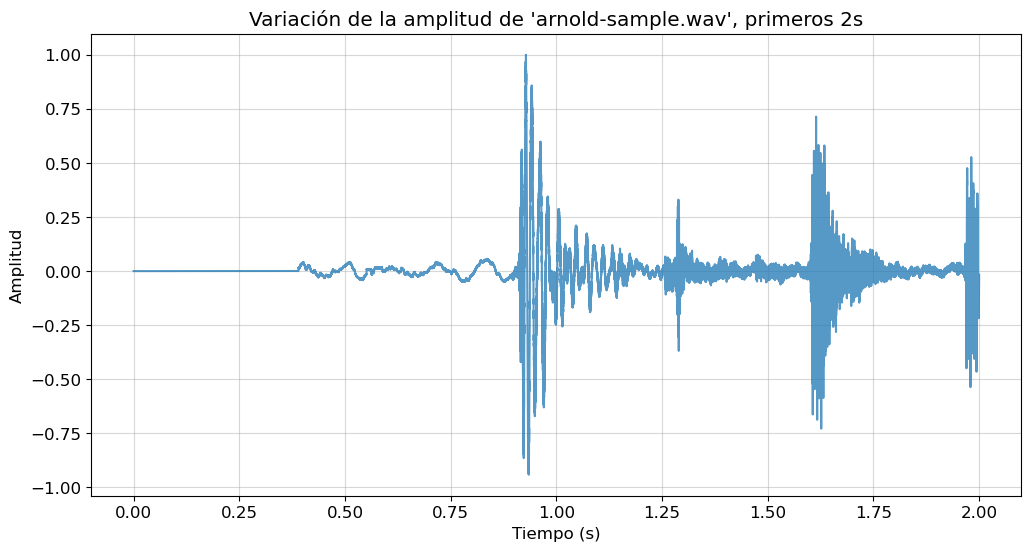

In [888]:
# Generamos el intervalo de tiempo para el eje x en los primeros 2s
first_two_seconds = len(data_percusion)
time_duration_percusion = np.linspace(0, percusion_duration, first_two_seconds)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_duration_percusion, data_percusion, alpha=0.75) 
plt.title("Variación de la amplitud de 'arnold-sample.wav', primeros 2s")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True, alpha=0.5)
plt.show()

Dado que se pide replicar desde 2.2 (a) hasta (e), no se ha guardado el audio, y no puedo oírlo para comentar en base a eso, pero mirando el plot en los primeros dos segundos, podemos notar picos muy pronunciados en la amplitud, con caidas rápidas, ese es el fenómeno de instrumetnos con percusión, esto sucede cuando la energía de una nota se libera de golpe y no de mantiene en el tiempo, sucede cuando se golpea algo rápidamente, y no cuando se toca algo como una flauta, que levemente va variando su enería en cada nota (amplitud).

In [889]:
fft_percution = np.fft.rfft(data_percusion) # FFT

# Frecuencia en hertz, calculo
freqs_percution = np.fft.rfftfreq(len(data_percusion), 1/sample_rate_arnold)
magnitud_percution = np.abs(fft_percution) # magnitud en valor absoluto

print(f"cantidad de componentes de frecuencia calculadas: {len(freqs_percution)}")

cantidad de componentes de frecuencia calculadas: 44101


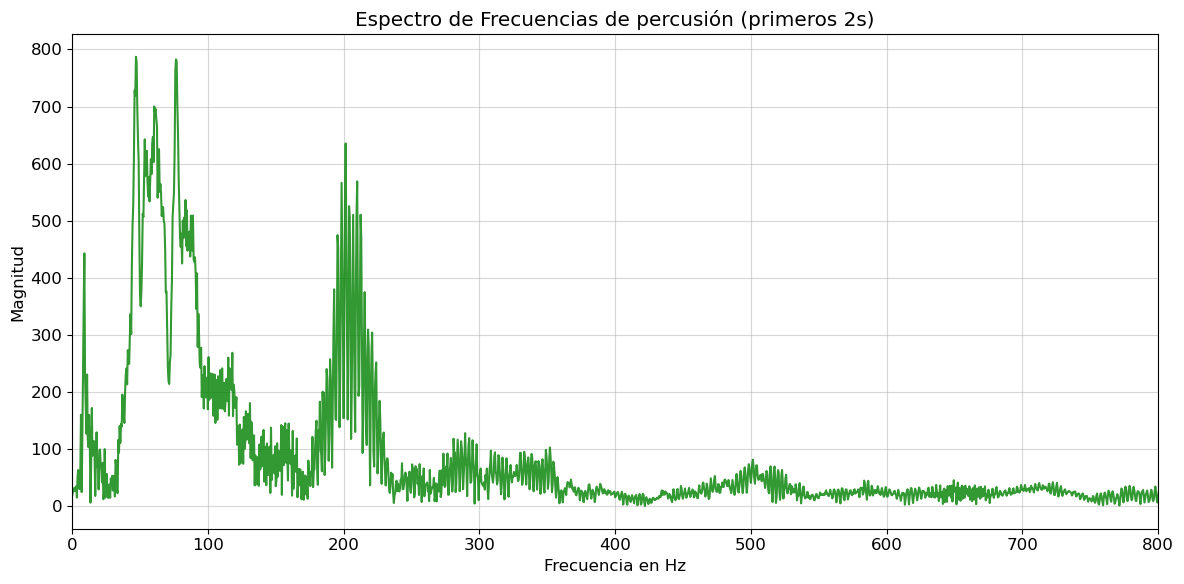

Top 10 frecuencias del fenómeno de percusión:
1 -   47.00Hz (Magnitud de 787.04)
2 -   76.50Hz (Magnitud de 782.64)
3 -   77.00Hz (Magnitud de 778.90)
4 -   47.50Hz (Magnitud de 777.55)
5 -   76.00Hz (Magnitud de 761.44)
6 -   46.00Hz (Magnitud de 727.89)
7 -   46.50Hz (Magnitud de 718.44)
8 -   77.50Hz (Magnitud de 703.16)
9 -   60.50Hz (Magnitud de 700.07)
10 -   48.00Hz (Magnitud de 695.92)


In [890]:
plt.figure(figsize=(12, 6))
plt.plot(freqs_percution, magnitud_percution, color='green', alpha=0.8)
plt.title("Espectro de Frecuencias de percusión (primeros 2s)")
plt.xlabel("Frecuencia en Hz")
plt.ylabel("Magnitud")
plt.xlim(0, 800) # Límite arbitrario en la frecuencia
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# loop de top 10 frecuencias:
top_idx_percution = np.argsort(magnitud_percution)[-10:][::-1] # 10 primeras, luego invertimos el orden
print("Top 10 frecuencias del fenómeno de percusión:")

for i, index in enumerate(top_idx_percution):
    print(f"{i+1} -   {freqs_percution[index]:.2f}Hz (Magnitud de {magnitud_percution[index]:.2f})")

Podemos apreciar el fenómeno de percusión, donde se ven picos muy juntos, pero no hay un patrón limpio, se ve como si sonaran más de un instrumento. No puedo decir mucho más, no sé mucho sobre análisis de sonido en base a gráficos de frecuencia.

Como vemos que las frecuencias de las campanas y percusión al comienzo están capturadas en los peaks, o sea, en los top frecuencias de mayor magnitud del fenómeno de percusión, ya que las tenemos identificadas podemos hacer un filtro como lo hicimos anteriormente, donde anulamos las frecuencias de las campanas y percusión, para que de esa forma anulemos su sonido del espectro. Una vez eliminemos esas frecuencias con el filtro del audio completo, habremos generado un nuevo .wav con la música completa sin las campanas y la percusión del inicio.

Con respecto a las frecuencias específicas, se ve que hay agrupamientos de frecuencias como se ha mencionado, y se ve que el fenómeno de percusión y las campanas tienen frecuencias de 47 y 77 Hz, con leves variaciones como, por ejemplo, de 76hz, 76.5, 77.5, etc. Pero podemos ver que, para el caso de 77Hz, aproximadamente se forman agrupamientos alrededor de esta frecuencia, donde hay frecuencias similares en el top 10 de frecuencias de mayor amplitud, con valores muy cercanos a 77, lo mismo ocurre con los 47Hz, así que esas son las frecuencias que pide el enunciado.